<a href="https://colab.research.google.com/github/Rafiqahh/APM_KLP10/blob/main/1911523007_MuhammadRafvyOctaNugraha_SVM_LInear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mengimport Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
#Mengimport dan Menampilkan Dataset
dataset = pd.read_csv('data_bayi_jawatengah.csv')
dataset

,tahun,wilayah,jumlah_bayi_lahir,kondisi_bayi,jumlah
0,2020,Kabupaten Cilacap,28303,berat_bayi_lahir_rendah,1052
1,2020,Kabupaten Banyumas,26473,berat_bayi_lahir_rendah,1724
2,2020,Kabupaten Purbalingga,14808,berat_bayi_lahir_rendah,767
3,2020,Kabupaten Banjarnegara,15330,berat_bayi_lahir_rendah,1033
4,2020,Kabupaten Kebumen,19548,berat_bayi_lahir_rendah,1003
...,...,...,...,...,...
65,2020,Kota Surakarta,9634,gizi_kurang,243
66,2020,Kota Salatiga,2469,gizi_kurang,81
67,2020,Kota Semarang,23825,gizi_kurang,920
68,2020,Kota Pekalongan,5905,gizi_kurang,989


In [ ]:
#Memanggil fungsi shape untuk melihat jumlah baris dan kolom
dataset.shape 

(70, 5)

In [ ]:
#Memanggil fungsi info untuk melihat nomor index beserta tipe datanya
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tahun              70 non-null     int64 
 1   wilayah            70 non-null     object
 2   jumlah_bayi_lahir  70 non-null     int64 
 3   kondisi_bayi       70 non-null     object
 4   jumlah             70 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ KB


In [ ]:
#Mengubah setiap nilai dalam kolom menjadi angka yang berurutan, dimana yang diubah nilainya yaitu nilai yang ada pada kolom kondisi_bayi
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataset['kondisi_bayi'] = labelencoder.fit_transform(dataset['kondisi_bayi'])
dataset

,tahun,wilayah,jumlah_bayi_lahir,kondisi_bayi,jumlah
0,2020,Kabupaten Cilacap,28303,0,1052
1,2020,Kabupaten Banyumas,26473,0,1724
2,2020,Kabupaten Purbalingga,14808,0,767
3,2020,Kabupaten Banjarnegara,15330,0,1033
4,2020,Kabupaten Kebumen,19548,0,1003
...,...,...,...,...,...
65,2020,Kota Surakarta,9634,1,243
66,2020,Kota Salatiga,2469,1,81
67,2020,Kota Semarang,23825,1,920
68,2020,Kota Pekalongan,5905,1,989


In [ ]:
#Deklarasi Variabel Dependent dan Independent
X = dataset[['jumlah_bayi_lahir', 'jumlah']]
y = dataset['kondisi_bayi']

In [ ]:
#Melakukan split dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
#Melakukan Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Menggunakan SVM library untuk membuat SVM classifier
classifier = svm.SVC(kernel = 'linear')
 
#Memasukkan training data kedalam classifier
classifier.fit(X_train, y_train)
 
#Memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(X_test)
 
#Menampilkan classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.80      0.89        10

    accuracy                           0.86        14
   macro avg       0.83      0.90      0.84        14
weighted avg       0.90      0.86      0.86        14



In [ ]:
#Menampilkan Confusion Matrix dan membagi 4 bagian

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4 0]
 [2 8]]

True Positives(TP) =  4

True Negatives(TN) =  8

False Positives(FP) =  0

False Negatives(FN) =  2


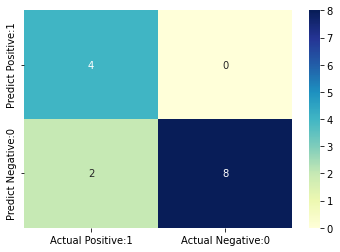

In [ ]:
#Memvisualisasikan confusion matrix 

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [38]:
#Melakukan prediksi hasil akurasi
from sklearn import metrics
y_pred = classifier.predict(X_test)
print("Hasil Akurasi : ", metrics.accuracy_score(y_test,y_pred))

Hasil Akurasi :  0.8571428571428571
